In [1]:
import os
import json
import warnings
import matplotlib.pyplot as plt
from itertools import zip_longest
import seaborn as sns
import pandas as pd

warnings.filterwarnings("ignore")

In [2]:
from util import (
    ticker_option, combine_dfs, get_stock_price, 
    prepare_ml_dataset, concatenate_strings, train_model,
    view_shap_value_for_instance
)

In [3]:
use_cache = True

In [4]:
if os.path.exists('price.json') & use_cache:
    # Read the dictionary from the JSON file
    with open('price.json', 'r') as json_file:
        price_dict = json.load(json_file)
else:
    price_dict = {}

In [5]:
len(price_dict)

20

In [6]:
# top 20+ tickers
ticker_list = [
    # "MSFT",
    "MSFT", "AAPL", "NVDA", "AMZN", "META", "GOOGL", "GOOG", "BRK.B", "LLY", "AVGO", "JPM", 
    "XOM", "TSLA", "UNH", "V", "PG", "MA", "COST", "JNJ", "HD", "MRK",
]
df = combine_dfs(ticker_list, price_dict)
df

MSFT
AAPL
NVDA
AMZN
META
GOOGL
GOOG
BRK.B
No options found for BRK.B
LLY
AVGO
JPM
XOM
TSLA
UNH
V
PG
MA
COST
JNJ
HD
MRK


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,type,exp,days_to_exp,stockPrice,option_ticker
0,AMZN240621P01540000,2022-04-27,1540.0,138.00,114.50,130.50,0.000000,0.000000,1.0,1.0,0.000010,True,REGULAR,USD,put,2024-06-21,785.21,138.17,AMZN
1,AMZN240621C01840000,2022-04-28,1840.0,1223.65,774.00,793.00,0.000000,0.000000,2.0,2.0,0.000000,False,REGULAR,USD,call,2024-06-21,784.43,144.60,AMZN
2,AMZN240621P01660000,2022-04-28,1660.0,84.30,145.00,161.00,0.000000,0.000000,3.0,2.0,0.000010,True,REGULAR,USD,put,2024-06-21,784.29,144.60,AMZN
3,AMZN240621C01640000,2022-04-29,1640.0,1114.45,904.00,922.00,0.000000,0.000000,2.0,2.0,0.000000,False,REGULAR,USD,call,2024-06-21,783.39,124.28,AMZN
4,AMZN240621C01740000,2022-04-29,1740.0,998.00,838.00,856.00,0.000000,0.000000,1.0,1.0,0.000000,False,REGULAR,USD,call,2024-06-21,783.18,124.28,AMZN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40882,AVGO240712P01290000,2024-06-05,1290.0,30.50,21.10,25.30,-22.779999,-42.755257,4.0,11.0,0.410544,False,REGULAR,USD,put,2024-07-12,36.37,1413.09,AVGO
40883,AVGO240712P01280000,2024-06-05,1280.0,23.48,18.70,22.60,-27.619999,-54.050880,1.0,3.0,0.409308,False,REGULAR,USD,put,2024-07-12,36.25,1413.09,AVGO
40884,AVGO240712P01275000,2024-06-05,1275.0,21.04,17.70,21.80,-28.309998,-57.365753,1.0,1.0,0.412481,False,REGULAR,USD,put,2024-07-12,36.29,1413.09,AVGO
40885,AVGO240712P01370000,2024-06-05,1370.0,52.88,46.20,51.40,-43.490000,-45.128150,2.0,2.0,0.401297,False,REGULAR,USD,put,2024-07-12,36.25,1413.09,AVGO


In [7]:
# save to json
with open('price.json', 'w') as json_file:
    json.dump(price_dict, json_file, indent=4)

In [8]:
df =  prepare_ml_dataset(df)
df

,strike,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,days_to_exp,stockPrice,type_call,type_put,lastPrice
0,1540.0,0.000000,0.000000,1.0,1.0,0.000010,1,785.21,138.17,0,1,138.00
1,1840.0,0.000000,0.000000,2.0,2.0,0.000000,0,784.43,144.60,1,0,1223.65
2,1660.0,0.000000,0.000000,3.0,2.0,0.000010,1,784.29,144.60,0,1,84.30
3,1640.0,0.000000,0.000000,2.0,2.0,0.000000,0,783.39,124.28,1,0,1114.45
4,1740.0,0.000000,0.000000,1.0,1.0,0.000000,0,783.18,124.28,1,0,998.00
...,...,...,...,...,...,...,...,...,...,...,...,...
22776,1300.0,-23.449999,-45.052834,2.0,19.0,0.406012,0,36.24,1413.09,0,1,28.60
22777,1290.0,-22.779999,-42.755257,4.0,11.0,0.410544,0,36.37,1413.09,0,1,30.50
22778,1280.0,-27.619999,-54.050880,1.0,3.0,0.409308,0,36.25,1413.09,0,1,23.48
22779,1275.0,-28.309998,-57.365753,1.0,1.0,0.412481,0,36.29,1413.09,0,1,21.04


In [9]:
# df = df[df['volume'] > 10].reset_index(drop=True)

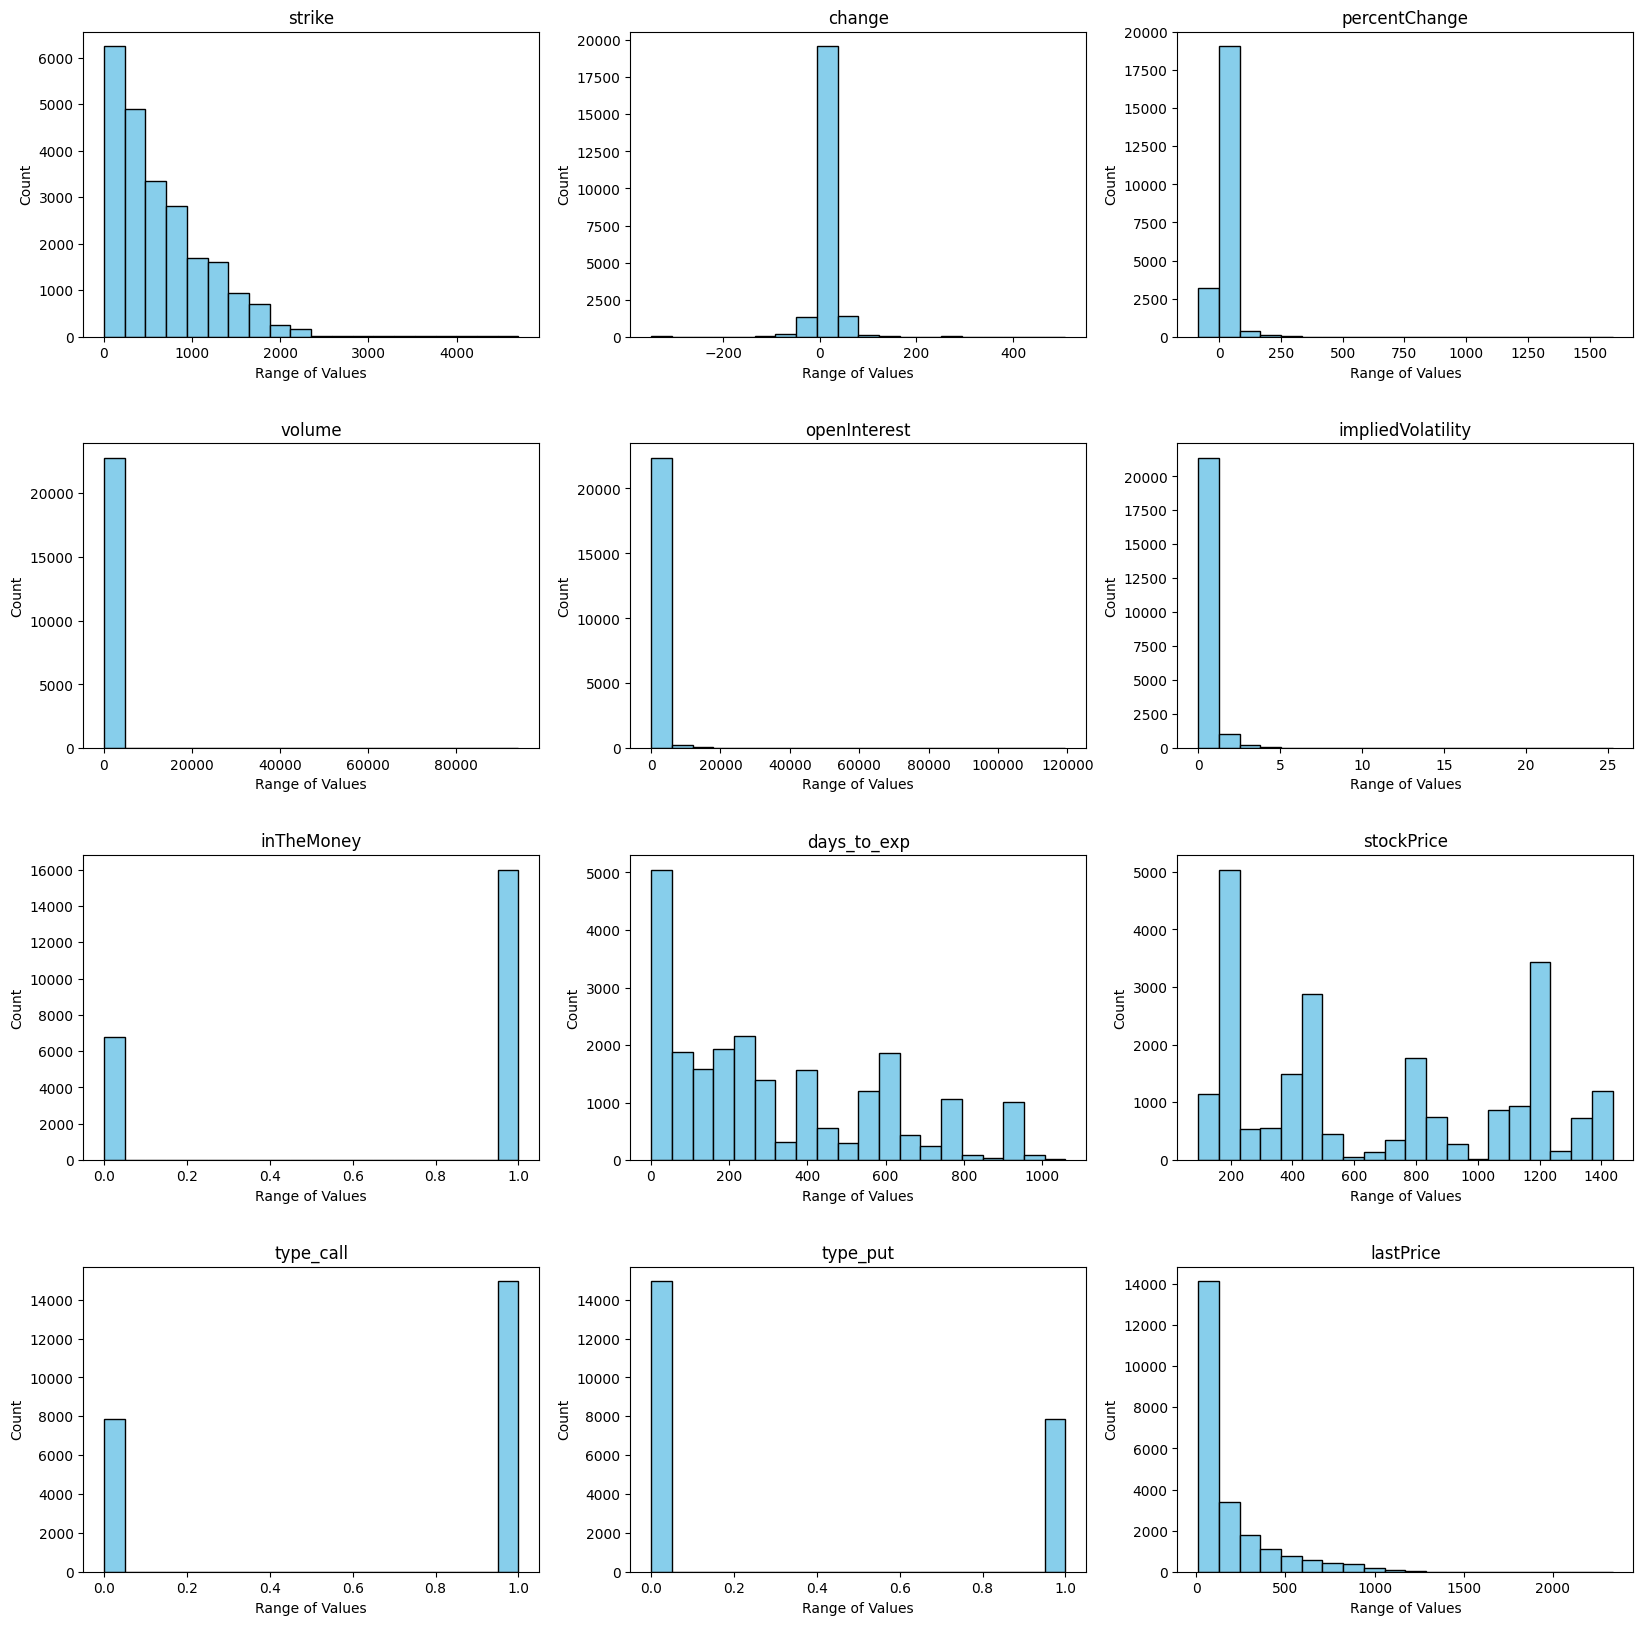

In [10]:
# Histogram plot of features
fig, axes = plt.subplots(4, 3, figsize=(20, 20), gridspec_kw={'hspace': 0.35})

axes_flat = axes.flatten()

for ax, col in zip_longest(axes_flat, df.iloc[:, :].columns):
    if col != None:
        ax.hist(df[col], bins=20, color='skyblue', edgecolor='black')
        ax.set_title(f"{col}")
        ax.set_xlabel('Range of Values')
        ax.set_ylabel('Count')
    else:
        ax.axis("off")

plt.show()

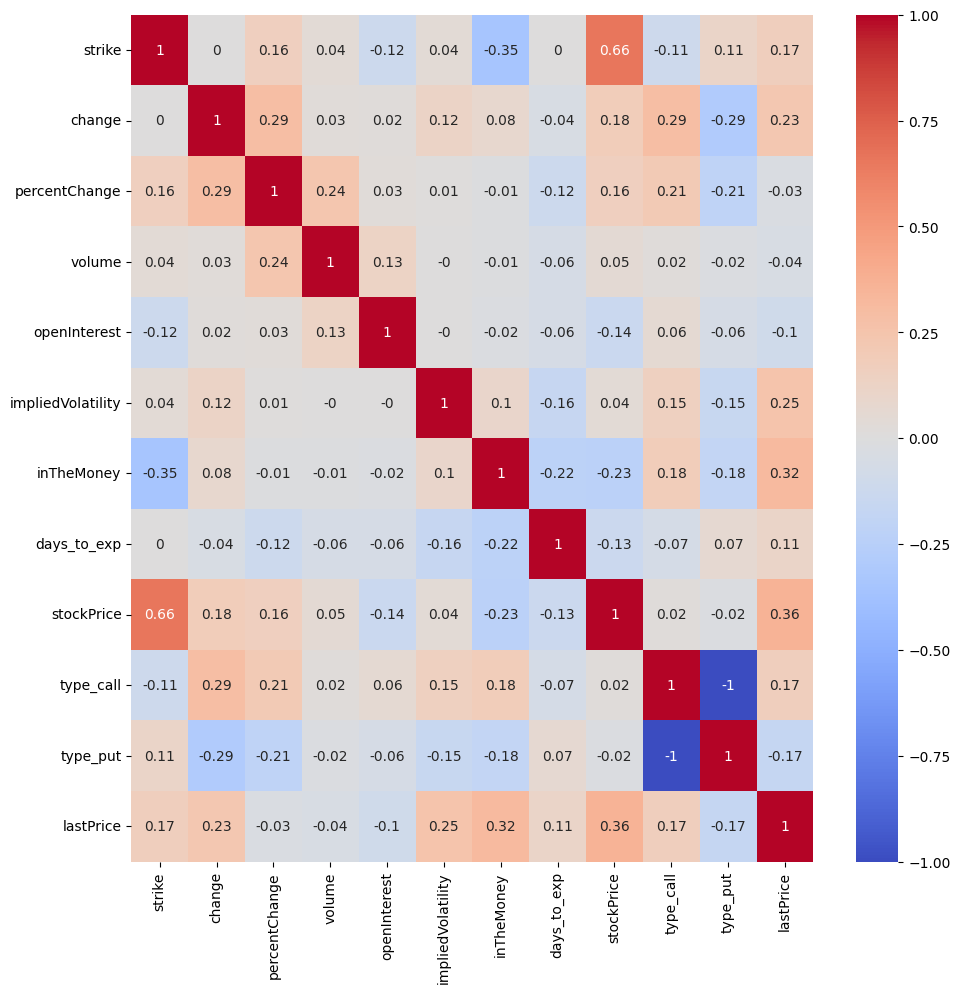

In [11]:
plt.figure(figsize = (11, 11))
sns.heatmap(round(pd.DataFrame(df, columns=df.columns).corr(), 2), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

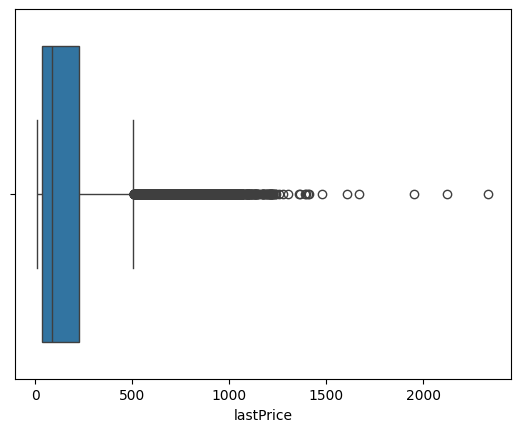

In [12]:
sns.boxplot(data=df['lastPrice'], orient='h')
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22781 entries, 0 to 22780
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   strike             22781 non-null  float64
 1   change             22781 non-null  float64
 2   percentChange      22781 non-null  float64
 3   volume             22781 non-null  float64
 4   openInterest       22781 non-null  float64
 5   impliedVolatility  22781 non-null  float64
 6   inTheMoney         22781 non-null  int32  
 7   days_to_exp        22781 non-null  float64
 8   stockPrice         22781 non-null  float64
 9   type_call          22781 non-null  int32  
 10  type_put           22781 non-null  int32  
 11  lastPrice          22781 non-null  float64
dtypes: float64(9), int32(3)
memory usage: 1.8 MB


In [14]:
df.describe()

,strike,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,days_to_exp,stockPrice,type_call,type_put,lastPrice
count,22781.000000,22781.000000,22781.000000,22781.000000,22781.000000,22781.000000,22781.000000,22781.000000,22781.000000,22781.000000,22781.000000,22781.000000
mean,641.497857,4.234772,5.952230,71.440543,587.415829,0.550613,0.702691,309.996979,676.653652,0.656029,0.343971,175.669370
std,527.387030,26.517113,41.298255,939.531817,2354.322644,0.772062,0.457084,268.514857,441.266761,0.475042,0.475042,220.864188
min,1.670000,-349.050000,-85.011000,1.000000,0.000000,0.000000,0.000000,1.170000,94.650000,0.000000,0.000000,10.010000
25%,220.000000,0.000000,0.000000,1.000000,9.000000,0.287681,0.000000,71.290000,195.870000,0.000000,0.000000,33.500000
50%,483.330000,0.000000,0.000000,3.000000,63.000000,0.426260,1.000000,226.250000,495.060000,1.000000,0.000000,82.980000
75%,920.000000,0.650001,1.971330,12.000000,322.000000,0.567784,1.000000,561.290000,1164.370000,1.000000,1.000000,222.350000
max,4700.000000,508.459960,1592.308600,94111.000000,119458.000000,25.289065,1.000000,1059.290000,1436.170000,1.000000,1.000000,2335.300000


In [15]:
# check if any of the column values is null
df[df.isna().any(axis=1)]

,strike,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,days_to_exp,stockPrice,type_call,type_put,lastPrice


In [16]:
models = [
    df
]

In [17]:
# models = [
#     df[(df['lastPrice'] >= 10) & (df['lastPrice'] < 25)],
#     df[(df['lastPrice'] >= 25) & (df['lastPrice'] < 50)],
#     df[(df['lastPrice'] >= 50) & (df['lastPrice'] < 100)],
#     df[(df['lastPrice'] >= 100) & (df['lastPrice'] < 250)],
#     df[(df['lastPrice'] >= 250) & (df['lastPrice'] < 500)],
#     df[(df['lastPrice'] >= 500) & (df['lastPrice'] < 1000)],
#     df[(df['lastPrice'] >= 1000)]
# ]

In [18]:
for df in models:
    print(len(df))
    X_test, y_test, shap_values, X, shap_explainer, bm = train_model(df)
    view_shap_value_for_instance(X_test, y_test, shap_values, X, shap_explainer, bm, 0)
    view_shap_value_for_instance(X_test, y_test, shap_values, X, shap_explainer, bm, 0)
    view_shap_value_for_instance(X_test, y_test, shap_values, X, shap_explainer, bm, 0)

22781


KeyboardInterrupt: 

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10), gridspec_kw={'hspace': 0.35})
axes_flat = axes.flatten()
plt.show()

In [ ]:
# X_test, y_test, shap_values, X, shap_explainer, bm = train_model(df)

In [ ]:
# view_shap_value_for_instance(X_test, y_test, shap_values, X, shap_explainer, bm, 0)

In [ ]:
# view_shap_value_for_instance(X_test, y_test, shap_values, X, shap_explainer, bm, 1)

In [ ]:
# view_shap_value_for_instance(X_test, y_test, shap_values, X, shap_explainer, bm, 2)